# Tricks of the trade TF/Keras 

In this script we build a small multilayer perceptron with two hidden layers having 500 and 50 neurons each for classifying the MNIST database of handwritten digits using Keras. It uses the full data set better to run on a GPU.

Below are several experiments.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np

import time
import tensorflow as tf
tf.set_random_seed(1)

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
import sys
print(keras.__version__, tf.__version__, sys.version_info)

1.2.2 1.0.0 sys.version_info(major=3, minor=4, micro=3, releaselevel='final', serial=0)


In [3]:
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
# Loads (if necessary) and caches the MNIST training data
# Used one_hot encoding, and reshaping --> 784
mnist = read_data_sets("../data/", one_hot=True, reshape=True, validation_size=2000)
X_train = mnist.train.images
X_val = mnist.validation.images

Y_train = mnist.train.labels
Y_val = mnist.validation.labels

X_train.shape, Y_train.shape, Y_val.shape, Y_train.shape

Extracting ../data/train-images-idx3-ubyte.gz
Extracting ../data/train-labels-idx1-ubyte.gz
Extracting ../data/t10k-images-idx3-ubyte.gz
Extracting ../data/t10k-labels-idx1-ubyte.gz


((58000, 784), (58000, 10), (2000, 10), (58000, 10))

### Suggestions for the experiment

Let the experiments run for 100 epochs. You might need to restart the kernel so that namings of the layers are the same

* with init zero 
* with sigmoid activation 
* with ReLU activation
* with dropout (p=0.3)
* with batch-normalization and dropout

In [ ]:
### First model with all zeros
name = 'sigmoid_init0'
model = Sequential()
model.add(Dense(500, batch_input_shape=(None, 784), init='zero'))
model.add(Activation('sigmoid'))

model.add(Dense(50,init='zero'))
model.add(Activation('sigmoid'))

model.add(Dense(10, activation='softmax',init='zero'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [ ]:
### Model with default initialization 
name = 'sigmoid'
model = Sequential()
model.add(Dense(500, batch_input_shape=(None, 784)))
#model.add(Dropout(0.3))
#model.add(keras.layers.normalization.BatchNormalization())
model.add(Activation('sigmoid'))

model.add(Dense(50))
#model.add(Dropout(0.3))
#model.add(keras.layers.normalization.BatchNormalization())
model.add(Activation('sigmoid'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [ ]:
### Model with default initialization 
name = 'relu'
model = Sequential()
model.add(Dense(500, batch_input_shape=(None, 784)))
#model.add(Dropout(0.3))
#model.add(keras.layers.normalization.BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(50))
#model.add(Dropout(0.3))
#model.add(keras.layers.normalization.BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [4]:
### Model with default initialization 
name = 'dropout'
model = Sequential()
model.add(Dense(500, batch_input_shape=(None, 784)))
model.add(Dropout(0.3))
#model.add(keras.layers.normalization.BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Dropout(0.3))
#model.add(keras.layers.normalization.BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [ ]:
### Model with default initialization 
name = 'dropout_batch'
model = Sequential()
model.add(Dense(500, batch_input_shape=(None, 784)))
model.add(Dropout(0.3))
model.add(keras.layers.normalization.BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Dropout(0.3))
model.add(keras.layers.normalization.BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [ ]:
model.summary()

### Untrained model


In [ ]:
np.log(0.1)

In [ ]:
model.evaluate(X_train[0:2000], Y_train[0:2000])

## Training

In [ ]:
log_dir='/notebooks/tensorflow/path_to_fc_nets/tb/' + name

In [ ]:
tensorboard = keras.callbacks.TensorBoard(
    log_dir='/notebooks/tensorflow/path_to_fc_nets/tb_full_mnist/' + name + '/', 
    write_graph=True,
    histogram_freq=5
)
history = model.fit(X_train,Y_train,          
          nb_epoch=1000, 
          batch_size=128, 
          callbacks=[tensorboard],
          validation_data=[X_val, Y_val], verbose=2)

# Attention, if you run this in a docker container, setting verbose=1 sometimes kills the whole container 
# ERRO[0695] error getting events from daemon: EOF

# Sometimes also the TensorBoard callback kills the container

## Using the trained model

In [60]:
from keras.models import load_model
model = load_model("dropout_batch.keras")

In [61]:
model.evaluate(mnist.test.images, mnist.test.labels)

 9696/10000 [============================>.] - ETA: 0s 

[0.10479215245115782, 0.98380000000000001]

In [62]:
pred = model.predict_classes(mnist.test.images)

 9984/10000 [============================>.] - ETA: 0s 

In [63]:
wrong = np.argmax(mnist.test.labels, axis=1) != pred

In [64]:
np.sum(wrong)

162

In [65]:
wrong_i = mnist.test.images[wrong]
wrong_l = mnist.test.labels[wrong]

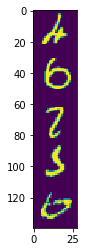

In [66]:
plt.imshow(wrong_i[0:5].reshape(28*5,28))

In [67]:
np.argmax(wrong_l[0:5], axis=1),

(array([4, 6, 2, 5, 6]),)

In [68]:
wrong_p = np.where(wrong)

In [69]:
pred[wrong_p][0:5]

array([2, 0, 7, 3, 0])